In [34]:
import tensorflow as tf
tf.__version__

'1.14.0'

In [35]:
mnist = tf.keras.datasets.mnist #handwritten dataset of digits from 0 to 9
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis=1)

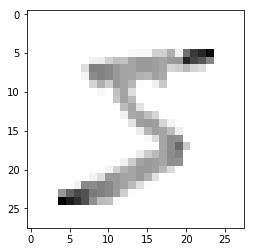

In [36]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary) #black and white color map
plt.show()

In [37]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#traning parameters
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2605 - acc: 0.9242
Epoch 2/3
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1031 - acc: 0.9678
Epoch 3/3
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0685 - acc: 0.9776


In [38]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 43us/sample - loss: 61.8825 - acc: 0.9545
61.88249111328125 0.9545


In [39]:
model.save('my_number_reader.model')

In [40]:
new_model = tf.keras.models.load_model('my_number_reader.model')

In [41]:
predictions = new_model.predict(x_test)

In [43]:
print(predictions)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Predicted Output:  8


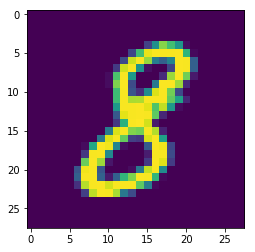

In [62]:
import numpy as np
print("Predicted Output: ",np.argmax(predictions[110]))
plt.imshow(x_test[110])
plt.show()